# You May Need to restart the notebook after the installation of some libraries

# Install, Import and Pull from Github

In [1]:
!pip install --upgrade gdown

In [2]:
!gdown --folder https://drive.google.com/drive/folders/1m0FG0Jp30C69ldQpeV2znD1sdZHA0Nni?usp=share_link

Retrieving folder list
Processing file 1avtBtLVT4DmMRqhKwZtL0NbEmijLOvbq CTB_128k_slack_0.h5
Processing file 1--K2OdkUqqsySACJVtNw1ZFom8i6s9qy CTB_128k_slack_1.h5
Processing file 1-3_DwYPWp8StDOdjj213XSihi8XUOlD4 CTB_128k_slack_2.h5
Processing file 1-6BLu2NayUc-eLMGdg790T-5R4QbeSpA CTB_128k_slack_3.h5
Processing file 1-ALMlaTjBIZuDQ1Y2scLAykN7zH-mP3u CTB_128k_slack_4.h5
Processing file 1-Drv_KwU9UDQ2V5TQuHtfvS1sYTe4heL CTB_128k_slack_5.h5
Processing file 1-JmxSnPt5AtFiBX82qWIBwX_s7BqiN2A CTB_128k_slack_6.h5
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From (uriginal): https://drive.google.com/uc?id=1avtBtLVT4DmMRqhKwZtL0NbEmijLOvbq
From (redirected): https://drive.google.com/uc?id=1avtBtLVT4DmMRqhKwZtL0NbEmijLOvbq&confirm=t&uuid=a3e081ac-78ee-4b11-b6cc-3e2d179e5936
To: /content/CTB/CTB_128k_slack_0.h5
100% 330M/330M [00:03<00:00, 99.9MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1--K2OdkUqqsyS

In [3]:
!git clone https://github.com/GX-BERT/GX-BERT.git
!mv ./GX-BERT/Classes ./
!pip install import-ipynb
import import_ipynb
import os


fatal: destination path 'GX-BERT' already exists and is not an empty directory.
mv: cannot stat './GX-BERT/Classes': No such file or directory


In [4]:
!pip install tensorflow==2.8.0

In [5]:
!pip install jax==0.4.8

In [6]:
!pip install jaxlib==0.4.7

In [7]:
!pip install umap-learn==0.5.3

In [8]:
!pip install datashader

In [9]:
from Classes.GX_BERT import projTransformer
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd

%load_ext tensorboard

importing Jupyter notebook from /content/Classes/GX_BERT.ipynb
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Prepare Dataset

In [10]:
newDataset1_0 = pd.read_hdf("CTB/CTB_128k_slack_0.h5", key="df", mode="r")
newDataset1_1 = pd.read_hdf("CTB/CTB_128k_slack_1.h5", key="df", mode="r")
newDataset1_2 = pd.read_hdf("CTB/CTB_128k_slack_2.h5", key="df", mode="r")
newDataset1_3 = pd.read_hdf("CTB/CTB_128k_slack_3.h5", key="df", mode="r")
newDataset1_4 = pd.read_hdf("CTB/CTB_128k_slack_4.h5", key="df", mode="r")
newDataset1_5 = pd.read_hdf("CTB/CTB_128k_slack_5.h5", key="df", mode="r")
newDataset1_6 = pd.read_hdf("CTB/CTB_128k_slack_6.h5", key="df", mode="r")
dataset = pd.concat([
                            newDataset1_0,
                            newDataset1_1,
                            newDataset1_2,
                            newDataset1_3,
                            newDataset1_4,
                            newDataset1_5,
                            newDataset1_6,
                         ])

In [11]:
test  = dataset[dataset['chromosome_name']=='chr8']
val   = dataset[dataset['chromosome_name']=='chr10']
train = dataset[dataset['chromosome_name']!='chr8'][dataset['chromosome_name']!='chr10']

len(test), len(val), len(train)

<ipython-input-11-1db137c4ffc6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train = dataset[dataset['chromosome_name']!='chr8'][dataset['chromosome_name']!='chr10']


(618, 683, 16832)

In [12]:
X_trainpromoter         = np.array(list(train['sequence']))
y_train                 = train['labels'].values

X_validationpromoter    = np.array(list(val['sequence']))
y_validation            = val['labels'].values

X_testpromoter         = np.array(list(test['sequence']))
y_test                 = test['labels'].values

In [13]:
k = 2**15
center = 128+2**16
leftpos  = center-k-1
rightpos = center+k-1
maxlen = rightpos-leftpos
leftpos, rightpos, maxlen

(32895, 98431, 65536)

In [14]:
X_train = tf.data.Dataset.from_tensor_slices(({'sequence': np.array(X_trainpromoter[:, leftpos:rightpos], dtype=np.uint8),      'target': y_train.reshape(-1,1)}))
X_val   = tf.data.Dataset.from_tensor_slices(({'sequence': np.array(X_validationpromoter[:, leftpos:rightpos], dtype=np.uint8), 'target': y_validation.reshape(-1,1)}))
X_test  = tf.data.Dataset.from_tensor_slices(({'sequence': np.array(X_testpromoter[:, leftpos:rightpos], dtype=np.uint8),       'target': y_test.reshape(-1,1)}))
cardinality = X_train.cardinality().numpy()


In [15]:
batch_size      = 128 # 256

In [16]:
X_train_tf = X_train.shuffle(cardinality*2).batch(batch_size).cache().prefetch(tf.data.AUTOTUNE).repeat()
X_val_tf   = X_val.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)
X_test_tf  = X_test.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

# Istantiate GX-BERT

In [17]:
model_type      = "GX-BERT"
logdir          = None
loss            = "mse"
p_enc           = "original"
pooler          = "tanh"
n_layers1       = 0
n_layers2       = 1
k_size          = "multiconv_proj" # "multiconv"
shift_freq      = False
plot_attention  = True
alternate       = None
timeskip        = False
compression     = False
convDownScale   = True
tss             = None
mask_embedding  = 4
add_reg         = True
embed_dim       = 128
ff_dim          = embed_dim*4
pool_size       = 128
dense           = 256
lr              = 5e-5 # 1e-4
lr_red_epoch    = 30
reduction_factor= 5
t_rate          = 0.1    # 0.1
halflife        = False
transcr_factors = False
sure            = False

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
model built
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 65536)]      0           []                     

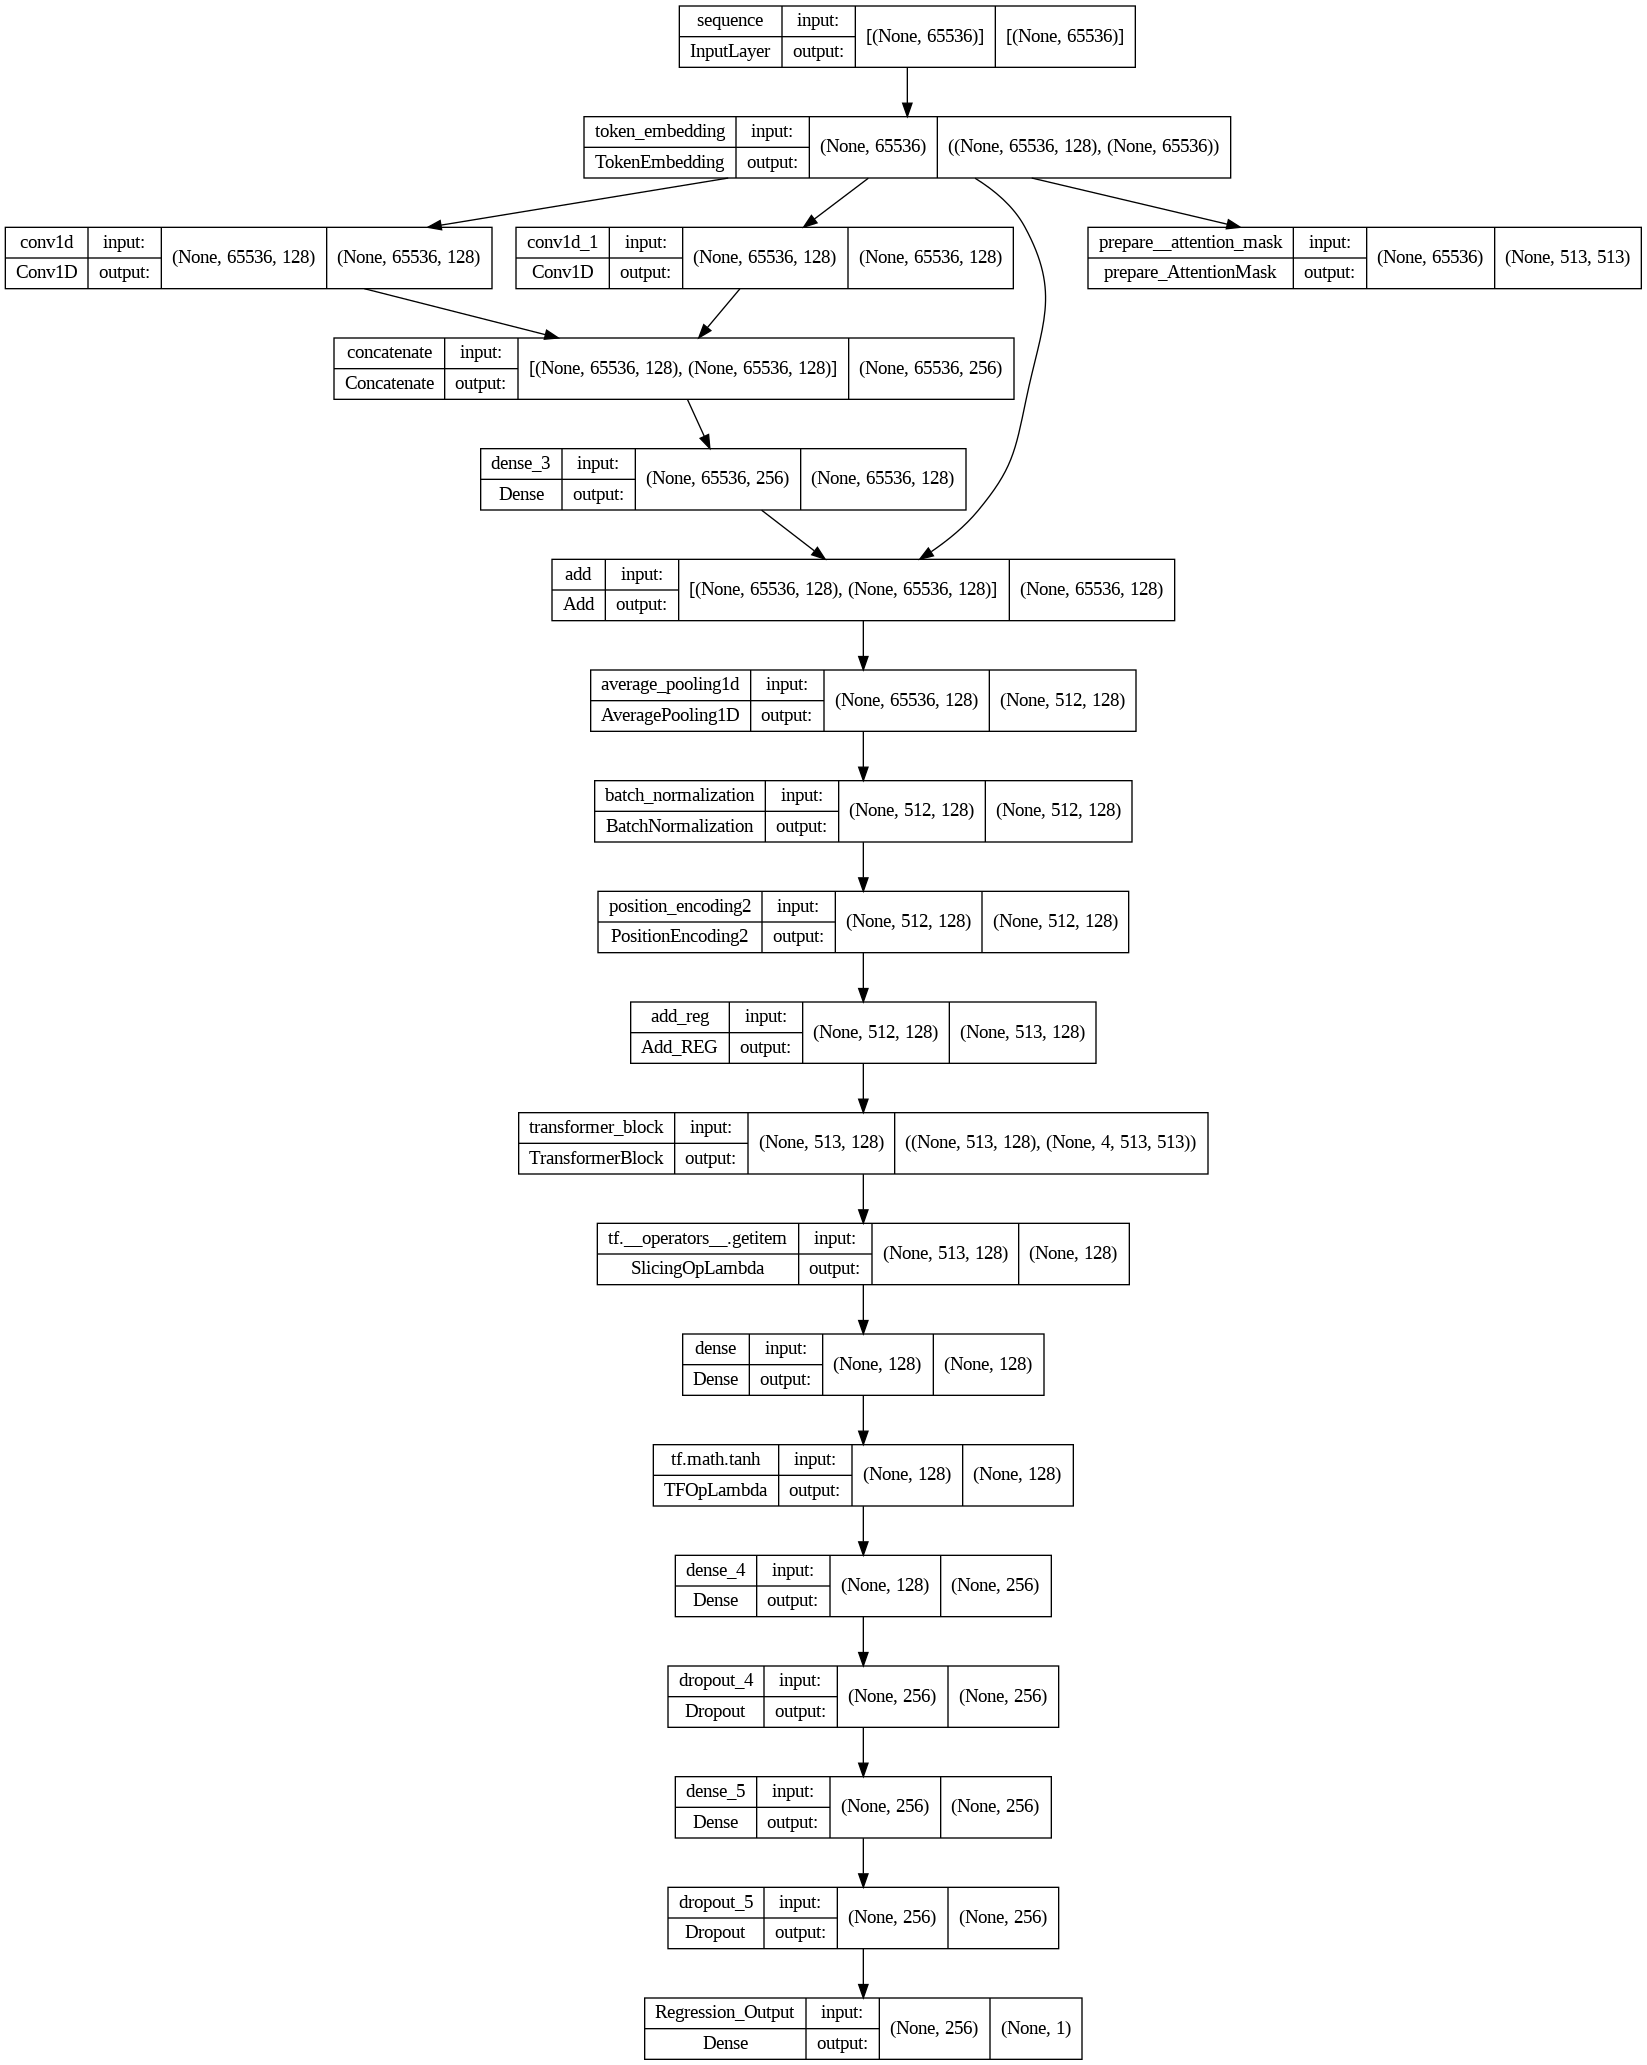


Parameters:

checkpoint_dir  :           
model_type  :               GX-BERT
n_epochs  :                 300
batch_size  :               128
learning_rate  :            5e-05
momentum  :                 0.9
maxlen  :                   65536
embed_dim  :                128
num_heads  :                4
ff_dim  :                   512
vocab_size  :               5
dense  :                    256
dropout_rate  :             0.1
lr_reduction_epoch  :       30
t_rate  :                   0.1
patience  :                 30
optimizer  :                BERTAdam
warmup_steps  :             1280
shuffle  :                  True
logdir  :                   None
loss  :                     mse
history  :                  
n_layers1  :                0
n_layers2  :                1
compression  :              False
plot_attention  :           True
k_size  :                   multiconv_proj
p_enc  :                    original
pooler  :                   tanh
alternate  :                None
times

In [18]:
# # Clear any logs from previous runs
# !rm -rf ./logs/transformer_best_0-001/
######################################################################################################################
import tensorflow as tf
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

with strategy.scope():
    net = projTransformer(checkpoint_dir="", model_type=model_type, n_epochs=300, batch_size=batch_size, alternate=alternate, tss=tss, pool_size=pool_size, mask_embedding=mask_embedding,
                      learning_rate=lr, patience=30, optimizer="BERTAdam", vocab_size=5, k_size = k_size, pooler=pooler, shift_freq=shift_freq, timeskip=timeskip,
                      lr_reduction_epoch=lr_red_epoch, maxlen=maxlen, embed_dim=embed_dim, num_heads=4, ff_dim=ff_dim, dense=dense, plot_attention=plot_attention, add_reg=add_reg,
                      dropout_rate=0.1, logdir=logdir, t_rate=t_rate, momentum=0.9, loss=loss, n_layers1=n_layers1, n_layers2=n_layers2, compression=compression,
                      p_enc=p_enc, reduction_factor=reduction_factor)

########################################################################################################################

In [19]:
X_train_d = strategy.experimental_distribute_dataset(X_train_tf)
X_val_d   = strategy.experimental_distribute_dataset(X_val_tf)
X_test_d  = strategy.experimental_distribute_dataset(X_test_tf)

# Load Model

In [20]:
saved_model_path = "GX-BERT/Saved_Models/GXBERT_CTB_65k_681"
load_options = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
best_model = tf.keras.models.load_model(saved_model_path, options=load_options)

# Save Results

y:  618
pred:  618
Test R^2 = 0.681
Test Pearson = 0.825
Test Spearman = 0.790




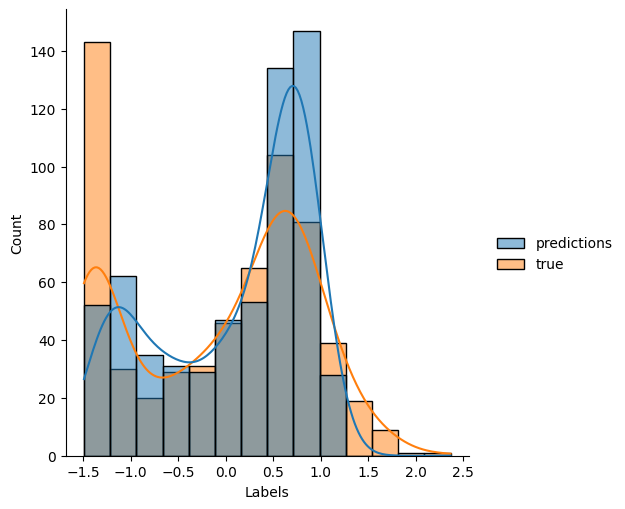

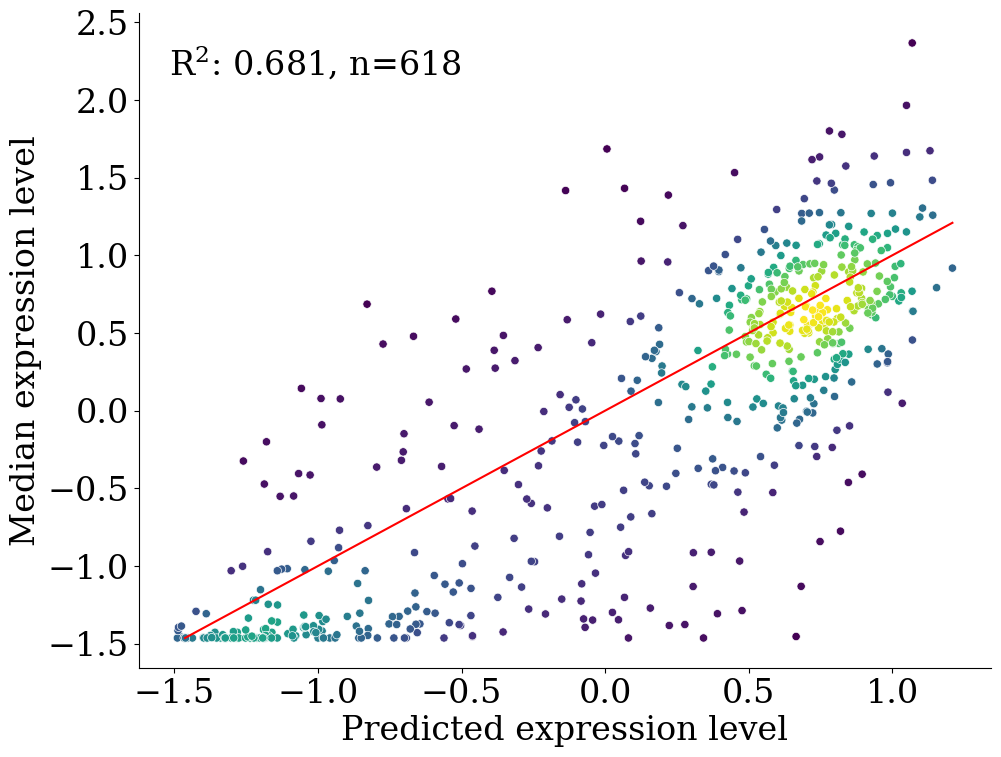

In [21]:
net.model = best_model
predictions, y = net.evaluate_model(X_test_d, strategy=strategy)
print("")
# predictions, y = net.evaluate_best_model(X_test_d, strategy=strategy)
print("")
net.plot_kde(X_test_d, strategy=strategy, predictions=predictions, y=y)
print("")
net.plot_r2(X_test_d, strategy=strategy, predictions=predictions, y=y)
print("")

In [22]:
loss =  tf.keras.losses.mean_squared_error
test['predictions'] = predictions
test['loss'] = loss(test['labels'].values.reshape(-1,1), np.array(predictions).reshape(-1,1))
test

<ipython-input-22-f3731acfd2b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions
<ipython-input-22-f3731acfd2b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['loss'] = loss(test['labels'].values.reshape(-1,1), np.array(predictions).reshape(-1,1))


,gene_name,gene_id,gene_type,TSS,genomic_strand,chromosome_name,sequence,split,labels,predictions,loss
ENSG00000174429,ABRA,ENSG00000174429.4,protein_coding,106770251,-,chr8,"[1, 1, 3, 0, 3, 1, 2, 3, 1, 3, 0, 0, 3, 3, 3, ...",train,-1.446893,-1.292305,0.023897
ENSG00000168619,ADAM18,ENSG00000168619.16,protein_coding,39584598,+,chr8,"[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, ...",train,-1.463212,-1.161588,0.090977
ENSG00000104755,ADAM2,ENSG00000104755.15,protein_coding,39838232,-,chr8,"[3, 0, 3, 0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, ...",train,-1.463212,-1.284832,0.031819
ENSG00000042980,ADAM28,ENSG00000042980.13,protein_coding,24294077,+,chr8,"[1, 1, 1, 1, 3, 0, 3, 0, 1, 3, 3, 0, 3, 1, 1, ...",train,-1.017306,-1.106866,0.008021
ENSG00000197140,ADAM32,ENSG00000197140.15,protein_coding,39107588,+,chr8,"[1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 3, 1, 1, 1, 0, ...",train,-1.167560,-0.528989,0.407772
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000179698,WDR97,ENSG00000179698.14,protein_coding,144107739,+,chr8,"[3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 2, 0, 2, 0, ...",train,-0.783590,-0.052490,0.534508
ENSG00000235173,HGH1,ENSG00000235173.7,protein_coding,144137774,+,chr8,"[1, 3, 1, 2, 0, 1, 1, 1, 2, 2, 3, 1, 3, 1, 3, ...",train,0.532404,0.519878,0.000157
ENSG00000179832,MROH1,ENSG00000179832.18,protein_coding,144148016,+,chr8,"[2, 2, 2, 2, 3, 0, 2, 2, 0, 3, 2, 1, 2, 3, 3, ...",train,0.423896,0.763600,0.115399
ENSG00000185803,SLC52A2,ENSG00000185803.12,protein_coding,144358613,+,chr8,"[3, 1, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, ...",train,1.063968,0.834376,0.052712


In [23]:
test.to_csv("test.csv")

# Plot Test Mean Attention Matrix

In [24]:
import seaborn as sns

In [25]:
# attention_plot_REG
def eval_step_function(model):
    @tf.function
    def eval_step(batch, head='Regression_Output', optimizer_clip_norm_global=0.2):
        inputs = [batch['sequence']]
        outputs     = model(inputs, training=False)
        return outputs['Attention_Scores'][0]
    return eval_step
eval_step =  eval_step_function(net.model)
att_sco_vec = tf.zeros([0,4,513,513])
for batch in X_test_d:
    att_sco   = strategy.run(eval_step, args=(batch,))
    att_sco   = strategy.gather(att_sco, axis=0)
    att_sco_vec=tf.concat([att_sco_vec, att_sco], axis=0)


In [26]:
att_sco_vec.shape
att_sco_mean = tf.reduce_mean(att_sco_vec[:, :,:,:], axis=0, keepdims=True).numpy()
att_sco_mean.shape


(1, 4, 513, 513)

In [27]:
import matplotlib
import matplotlib.pyplot as plt
# from Classes.Transformer_3 import attention_plot_CLS
plt.clf()
plt.rcParams["figure.figsize"] = (20,10)
plt.figure(dpi=1400)
params = {'mathtext.default': 'regular',
          'axes.spines.top': False,
          'axes.spines.right': False,
          'legend.handlelength': 0.5,
          }
plt.rcParams.update(params)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

cust_palette = sns.color_palette([(31/255, 60/255, 180/255), (44/255,160/255, 44/255), (178/255,74/255,75/255,1)])
def single_attentionplot_CLS(ax, ax_histx, ax_histy, catt, j, i):
    ax.matshow(catt, cmap="viridis")
    ax.set_yticks([int((catt.shape[0]-1)*i/6) for i in range(7)])

    ax_histx.matshow(catt[0:1, :], cmap="viridis")
    ax_histx.set(aspect=(catt.shape[0])/13)
    ax_histy.matshow(catt[:, 0:1], cmap="viridis")
    ax_histy.set(aspect=(13/catt.shape[0]))

    ax_histx.set_xticks([int((catt.shape[0]-1)*i/6) for i in range(7)])
    ax_histx.set_yticks([0])
    ax_histx.set_yticklabels(['[CLS]'])

    ax_histy.set_xticks([])
    ax_histy.set_xticklabels([])
    ax_histy.set_yticks([])

    if i == 0 and j==0:
        ax_histx.set_title(f"Head {i+1}",pad=20)
    # elif i==0:
    #     ax_histx.set_title(f"Layer{j+1}\n",pad=20)
    elif j==0:
        ax_histx.set_title(f"Head {i+1}",pad=20)
    ax.set_xticks([])

    ########################################################
def attention_plot_CLS(atts, epoch, show=True, fontsize=16.0):
    if len(atts)==0:
        return 0
    # plt.rcParams.update({'font.size': fontsize})
    collapsed_atts = []
    for catts in atts:
        collapsed_atts.append(np.mean(catts, axis=0, keepdims=True))

    n_heads = atts[0].shape[1]
    matdim = atts[0].shape[2]-1
    gene=13
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.000
    fig = plt.figure(figsize=(10,  10))
    for j, catts in enumerate(collapsed_atts):
        for i in range(n_heads):
            leftslack = 0.8*i
            bottomslack = 0.8*j
            rect_scatter = [left + leftslack,                   bottom - bottomslack,                    width, height]
            rect_histx   = [left + leftslack,                   bottom + height + spacing - bottomslack, width, 0.05]
            rect_histy   = [left + width + spacing + leftslack, bottom - bottomslack,                    0.05,  height]
            ax       = fig.add_axes(rect_scatter)
            ax_histx = fig.add_axes(rect_histx)
            ax_histy = fig.add_axes(rect_histy)
            single_attentionplot_CLS(ax, ax_histx, ax_histy, catts[0, i, :, :], j, i)

    # fig.suptitle(f'Mean Attention Plot - Epoch: {epoch}')
    if show:
        plt.show()
    else:
        plt.savefig(f"/tmp/att_plots/attention_plot_CLS_{epoch}")

<Figure size 640x480 with 0 Axes>

<Figure size 28000x14000 with 0 Axes>

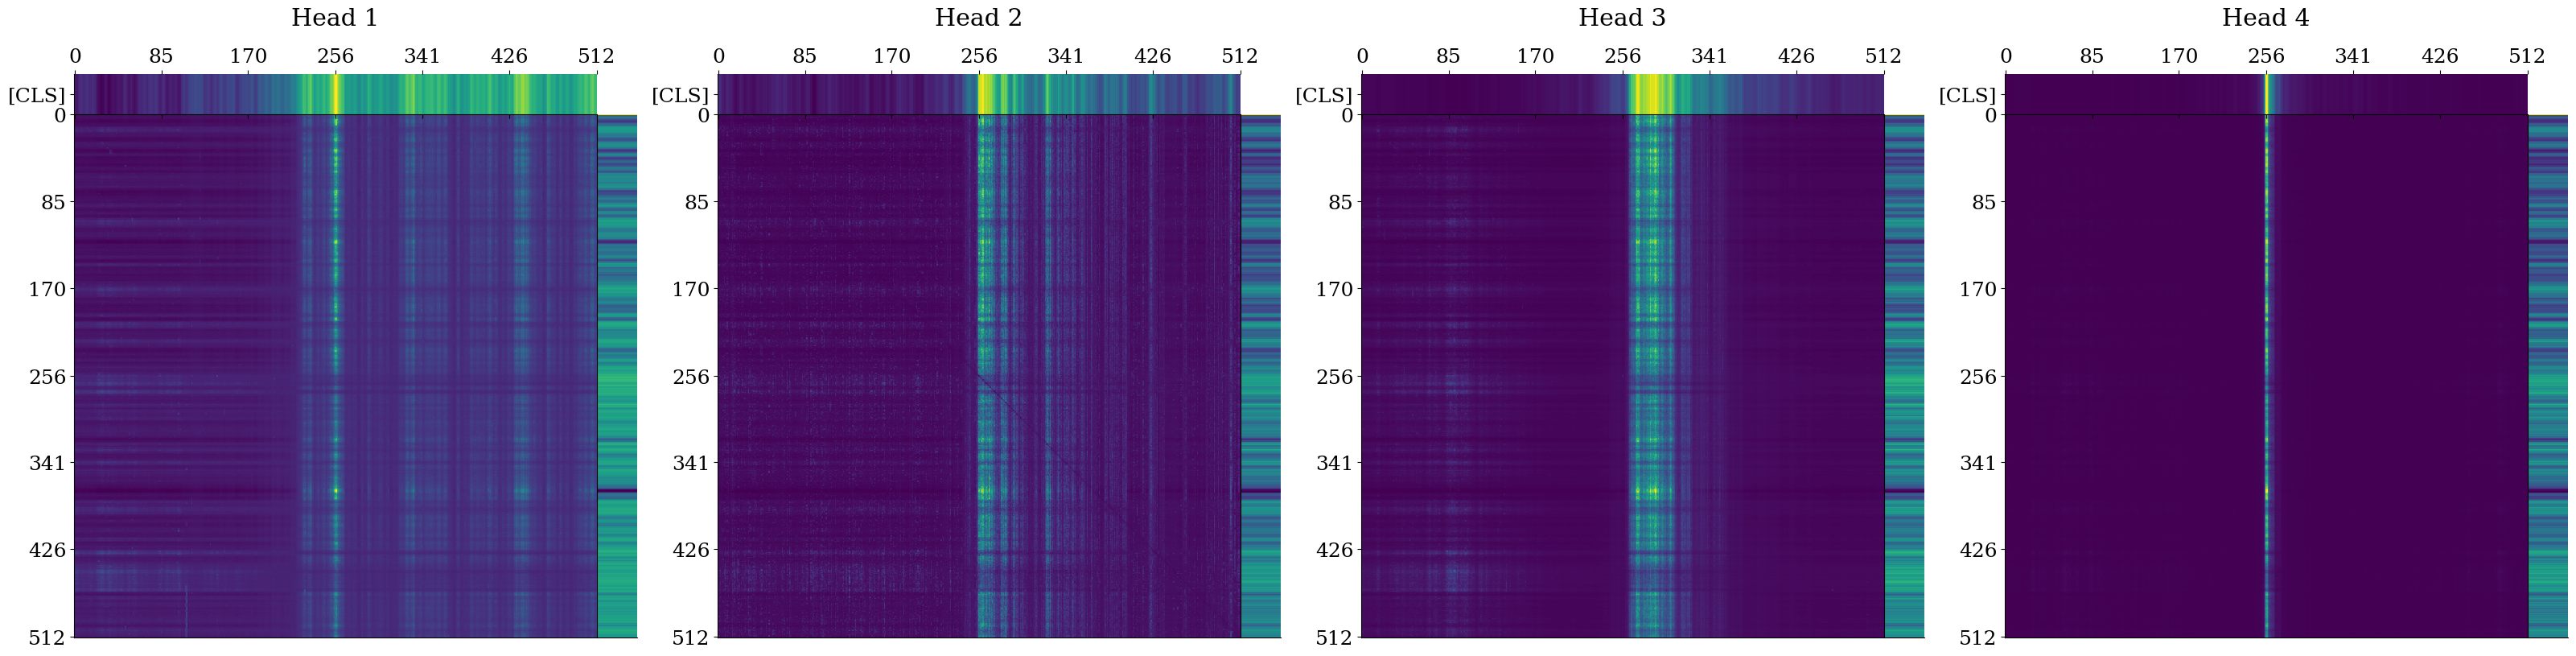

In [28]:
attention_plot_CLS([att_sco_mean], "lowest validation loss")

# Attention Track Manifold Learning


In [29]:
!pip install pandas matplotlib datashader bokeh holoviews scikit-image colorcet

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, SpectralEmbedding, MDS
import umap
import plotly.express as px
import umap.plot
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

In [49]:
test_out = net.model(np.array(np.array(list(test.sequence.values))[:, leftpos:rightpos], dtype=np.uint8))

In [50]:
att_test_out_1 = test_out["Attention_Scores"][0][:150,      :, 0, :].numpy()
att_test_out_2 = test_out["Attention_Scores"][0][150:300,   :, 0, :].numpy()
att_test_out_3 = test_out["Attention_Scores"][0][300:450,   :, 0, :].numpy()
att_test_out_4 = test_out["Attention_Scores"][0][450:,      :, 0, :].numpy()
att_test_out = np.concatenate([
                                att_test_out_1,
                                att_test_out_2,
                                att_test_out_3,
                                att_test_out_4
                                ])

test_CLS_mean = np.mean(att_test_out, axis=1)
full_att      = att_test_out.reshape(618,4*513)
att_test_out.shape, test_CLS_mean.shape, full_att.shape

((618, 4, 513), (618, 513), (618, 2052))

In [51]:
n_components = 2
data_full  = full_att                          # test_CLS_mean # full_att # att_test_out[:, 3, :]
data_full  = StandardScaler().fit_transform(data_full)
data_head1 = att_test_out[:, 0, :]                          # test_CLS_mean # full_att # att_test_out[:, 3, :]
data_head1 = StandardScaler().fit_transform(data_head1)
data_head2 = att_test_out[:, 1, :]                          # test_CLS_mean # full_att # att_test_out[:, 3, :]
data_head2 = StandardScaler().fit_transform(data_head2)
data_head3 = att_test_out[:, 2, :]                          # test_CLS_mean # full_att # att_test_out[:, 3, :]
data_head3 = StandardScaler().fit_transform(data_head3)
data_head4 = att_test_out[:, 3, :]                          # test_CLS_mean # full_att # att_test_out[:, 3, :]
data_head4 = StandardScaler().fit_transform(data_head4)

attention_data = [data_full, data_head1, data_head2, data_head3, data_head4]

In [52]:
umap_data_vec = []
for data in attention_data:
    mapper = umap.UMAP(
                n_neighbors=30,
                metric='cosine',         # manhattan # euclidean # cosine # chebyshev # minkowski
                # min_dist=0,                 # min_dist=0,
                # local_connectivity=7,      # local_connectivity=7,
                repulsion_strength=1,     # repulsion_strength=5.0,
                negative_sample_rate=5,    # negative_sample_rate=10,
                n_components=n_components,  # n_components=n_components,
                random_state=42,            # random_state=42,
                n_epochs=1500,               # n_epochs=500,
            ).fit(data)
    umap_data = mapper.embedding_
    umap_data_vec.append(umap_data)

In [53]:
proj_df_2 = pd.DataFrame({
                            'x_umap_full':    umap_data_vec[0][:,0],
                            'y_umap_full':    umap_data_vec[0][:,1],
                            'x_umap_head1':   umap_data_vec[1][:,0],
                            'y_umap_head1':   umap_data_vec[1][:,1],
                            'x_umap_head2':   umap_data_vec[2][:,0],
                            'y_umap_head2':   umap_data_vec[2][:,1],
                            'x_umap_head3':   umap_data_vec[3][:,0],
                            'y_umap_head3':   umap_data_vec[3][:,1],
                            'x_umap_head4':   umap_data_vec[4][:,0],
                            'y_umap_head4':   umap_data_vec[4][:,1],
                            'prediction': test.predictions.values,
                            'labels': test.labels.values,
                            # 'predicted_expression_category': test.predicted_expression_category.values,
                            # 'expression_category': test.expression_category.values,
                            'gene_id': test.index,
                            'loss': test.loss.values
                        })
# proj_df_2 = pd.DataFrame({  'x_tsne':   TSNE_data[:,0],
#                             'y_tsne':   TSNE_data[:,1],
#                             'x_isom':   Isomap_data[:,0],
#                             'y_isom':   Isomap_data[:,1],
#                             'x_llem':   LLE_data[:,0],
#                             'y_llem':   LLE_data[:,1],
#                             'x_spec':   Spectral_data[:,0],
#                             'y_spec':   Spectral_data[:,1],
#                             'x_mdse':   MDS_data[:,0],
#                             'y_mdse':   MDS_data[:,1],
#                             'x_umap':   umap_data[:,0],
#                             'y_umap':   umazp_data[:,1],
#                             'prediction': test.predictions.values,
#                             'labels': test.labels.values,
#                             'predicted_expression_category': test.predicted_expression_category.values,
#                             'expression_category': test.expression_category.values,
#                             'gene_id': test.index,
#                             'loss': test.loss.values
#                         })

In [54]:
norm = proj_df_2["loss"].values.copy()
epsilon = 0.0005
idxs = norm < epsilon
norm[idxs] = epsilon
proj_df_2["alpha"] = np.array(0.01+np.log(np.ones(norm.shape) / norm))
proj_df_2["alpha"] = (proj_df_2["alpha"].values - np.min(proj_df_2["alpha"].values))/(np.max(proj_df_2["alpha"].values)-np.min(proj_df_2["alpha"].values))
proj_df_2

,x_umap_full,y_umap_full,x_umap_head1,y_umap_head1,x_umap_head2,y_umap_head2,x_umap_head3,y_umap_head3,x_umap_head4,y_umap_head4,prediction,labels,gene_id,loss,alpha
0,22.110222,10.204992,9.660053,5.959509,6.425470,5.499412,9.510257,1.193787,31.197355,20.686548,-1.292305,-1.446893,ENSG00000174429,0.023897,0.575180
1,21.450598,9.278119,7.936974,6.074450,4.810068,5.222161,7.589062,3.956415,30.915119,20.277670,-1.161588,-1.463212,ENSG00000168619,0.090977,0.428315
2,21.743078,10.108207,8.074213,4.708762,5.287808,6.553504,8.003909,1.200714,30.201763,21.120523,-1.284832,-1.463212,ENSG00000104755,0.031819,0.543727
3,21.673615,10.006616,10.210469,6.337594,5.638627,4.073068,7.297058,3.700015,30.319750,21.383381,-1.106866,-1.017306,ENSG00000042980,0.008021,0.695117
4,21.679573,7.637764,10.559213,5.137788,2.992850,3.964886,9.679338,4.894316,39.618038,29.062910,-0.528989,-1.167560,ENSG00000197140,0.407772,0.263514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,21.304419,8.334429,11.332176,7.085836,5.870385,3.794142,10.219781,5.284718,31.107492,21.774374,-0.052490,-0.783590,ENSG00000179698,0.534508,0.233782
614,22.297806,5.170723,9.445709,4.647721,2.902321,6.930424,9.677862,3.287392,39.877975,29.306862,0.519878,0.532404,ENSG00000235173,0.000157,1.000000
615,23.497232,2.995811,9.914621,6.979475,2.777555,4.104901,7.718107,2.403352,40.573410,29.892807,0.763600,0.423896,ENSG00000179832,0.115399,0.402192
616,22.782602,7.992525,9.664687,4.902400,4.295675,4.548489,8.160369,0.304053,38.881271,28.170105,0.834376,1.063968,ENSG00000185803,0.052712,0.488272


<Figure size 400x400 with 0 Axes>

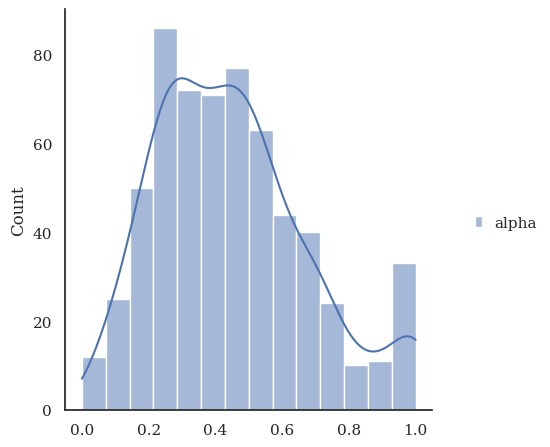

In [55]:
plt.clf()
sns.displot(data=proj_df_2[["alpha"]], kde=True)
plt.show()

In [56]:
plt.figure(dpi=1400)
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style(style='white')

params = {'mathtext.default': 'regular',
          'axes.spines.top': False,
          'axes.spines.right': False,
          'axes.spines.left': False,
          'axes.spines.bottom': False,
          }
plt.rcParams.update(params)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)
cust_palette = sns.blend_palette([(31/255, 60/255, 180/255), (31/255, 60/255, 180/255), (44/255,160/255, 44/255), (178/255,74/255,75/255,1),  (178/255,74/255,75/255,1)], as_cmap=True, input='rgb', n_colors=6)

<Figure size 5600x5600 with 0 Axes>

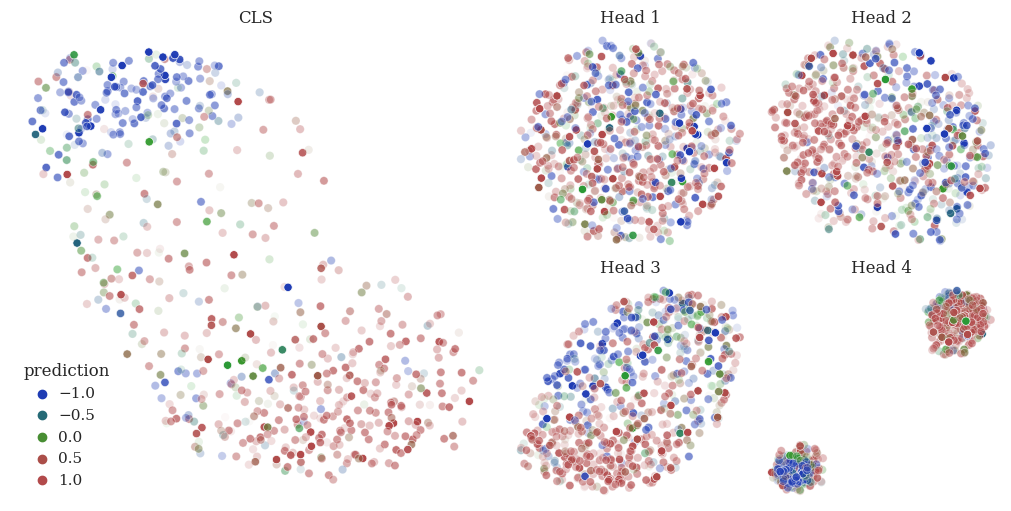

In [57]:
plt.clf()
fig = plt.figure(layout='constrained', figsize=(10, 5))
subfigs = fig.subfigures(1, 2, wspace=0)
axsLeft = subfigs[0].subplots()
g = sns.scatterplot(data=proj_df_2[proj_df_2['loss']<10], x="x_umap_full", y="y_umap_full", #[proj_df_2['loss']<0.1]  # [proj_df_2['prediction']**2>0.75]
                hue="prediction",
                alpha=proj_df_2['alpha'].values,
                palette=cust_palette, # ['blue', 'red', 'cyan']
                # palette="icefire",
                linewidth=0.5,# predicted_expression_category # prediction
                # **{'edgecolors':'none'}
                edgecolors='none',
                ax=axsLeft
                )
# g.set_axis_labels("distance (kb)", "auPRC")
# g.set_titles("{col_name}")
# g.despine(left=True)
g.set(title=f"CLS")
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticklabels=[])
g.set(yticklabels=[])
g.tick_params(bottom=False, left=False)
sns.move_legend(
    g,
    "lower left",
    # bbox_to_anchor=(.5, 1), ncol=5,
    title="prediction", frameon=False,
)
# sns.move_legend(
#     g, "lower center",
#     bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False,
# )
axsRight = subfigs[1].subplots(2, 2)
for r in range(0,2):
    for c in range(0,2):
        g = sns.scatterplot(data=proj_df_2[proj_df_2['loss']<10], x=f"x_umap_head{r*2+c+1}", y=f"y_umap_head{r*2+c+1}", #[proj_df_2['loss']<0.1]  # [proj_df_2['prediction']**2>0.75]
                    hue="prediction",
                    alpha=proj_df_2['alpha'].values,
                    # palette=sns.blend_palette(['blue', 'red', 'cyan'], as_cmap=True, input='rgb'), # ['blue', 'red', 'cyan']
                    # palette="icefire",
                    palette=cust_palette,
                    linewidth=0.5,# predicted_expression_category # prediction
                    # **{'edgecolors':'none'}
                    edgecolors='none',
                    ax = axsRight[r,c],
                    legend = False,
                    )
        # g.set_axis_labels("distance (kb)", "auPRC")
        # g.set_titles("{col_name}")
        # g.despine(left=True)
        g.set(title=f"Head {r*2+c+1}")
        g.set(xlabel=None)
        g.set(ylabel=None)
        g.set(xticklabels=[])
        g.set(yticklabels=[])
        g.tick_params(bottom=False, left=False)

plt.show()